In [28]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px

In [96]:
df = pd.read_csv("mpg.csv")

In [105]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin           object
name             object
dtype: object

In [104]:
df.horsepower.unique()

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
        nan, 100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,
        65.,  69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137.,
       158., 167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,
        78.,  52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,
        81.,  79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,
        48.,  66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62.,
       132.,  84.,  64.,  74., 116.,  82.])

In [101]:
df.loc[df.horsepower=='?', 'horsepower'] = np.NaN

In [103]:
df['horsepower'] = pd.to_numeric(df.horsepower)

In [7]:
df.origin.unique()

array([1, 3, 2])

In [97]:
mapping = {1 : "usa", 3 : "japan", 2 : "europe"}
df['origin'] = df.origin.map(mapping)

In [15]:
df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
393,27.0,4,140.0,86,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,usa,ford ranger
397,31.0,4,119.0,82,2720,19.4,82,usa,chevy s-10


In [19]:
df.groupby('origin').name.count()

origin
europe     70
japan      79
usa       249
Name: name, dtype: int64

/home/jupyter/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


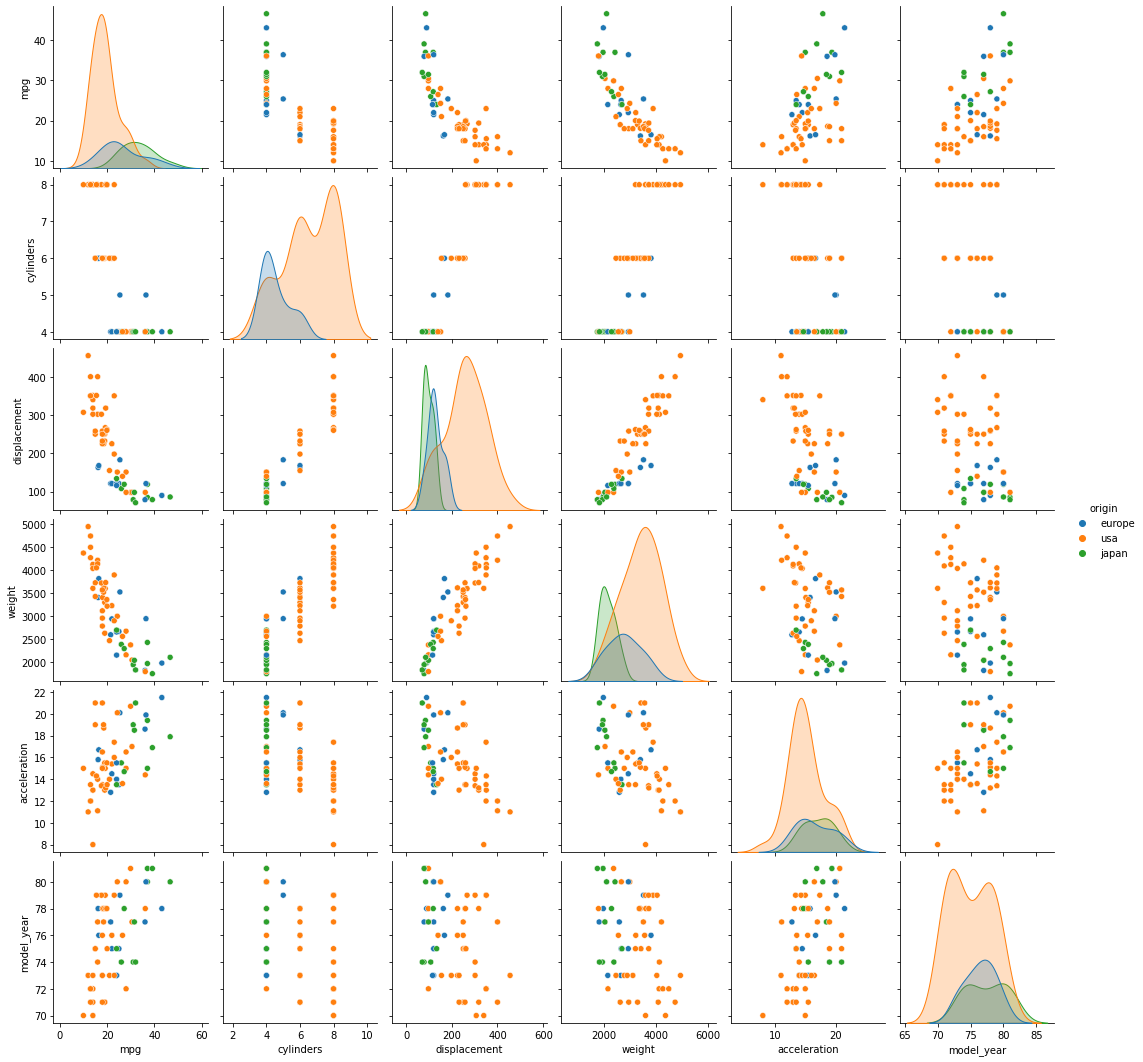

In [18]:
#df.mpg.hist()
sns.pairplot(df.sample(60), hue='origin')

<AxesSubplot:>

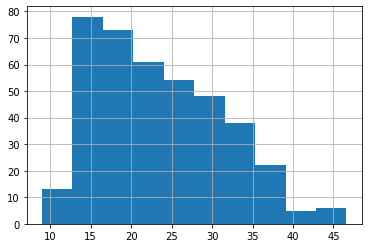

In [20]:
df.mpg.hist()

In [118]:
px.scatter_matrix(df)

<AxesSubplot:xlabel='mpg', ylabel='Density'>

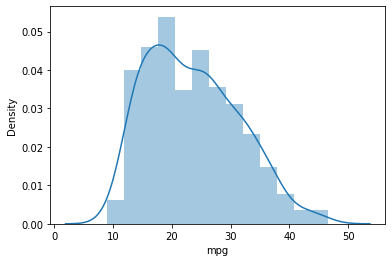

In [26]:
sns.distplot(df.mpg)

<AxesSubplot:xlabel='origin', ylabel='mpg'>

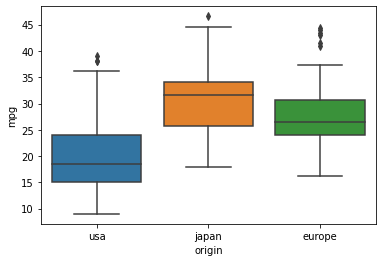

In [23]:
sns.boxplot(x=df.origin, y=df.mpg)

In [36]:
df_viz = df.groupby(['model_year', 'origin'])[['mpg']].mean().reset_index()
df_viz.columns = ['model_year', 'origin', 'average_mpg']
df_viz.head()

,model_year,origin,average_mpg
0,70,europe,25.200000
1,70,japan,25.500000
2,70,usa,15.272727
3,71,europe,28.750000
4,71,japan,29.500000


In [40]:
fig = px.line(df_viz, x="model_year", y="average_mpg", color='origin')
fig.show()

In [57]:
fig = px.histogram(df, x="displacement", color='origin', nbins=20)
fig.show()

In [59]:
fig = px.box(df, y="mpg", color='origin')
fig.show()

In [47]:
df[(df.mpg>37.3) & (df.origin=='europe')]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
244,43.1,4,90.0,48,1985,21.5,78,europe,volkswagen rabbit custom diesel
309,41.5,4,98.0,76,2144,14.7,80,europe,vw rabbit
325,44.3,4,90.0,48,2085,21.7,80,europe,vw rabbit c (diesel)
326,43.4,4,90.0,48,2335,23.7,80,europe,vw dasher (diesel)
330,40.9,4,85.0,?,1835,17.3,80,europe,renault lecar deluxe
394,44.0,4,97.0,52,2130,24.6,82,europe,vw pickup


In [67]:
# Ausreißer: Welche mpg-Werte aus Europa sind größer als "1,5* IQR + Q3 (75%-Quartil)"
my_df = df[df.origin=='europe']
iqr = my_df.mpg.quantile(0.75) - my_df.mpg.quantile(0.25)
upper_fence = my_df.mpg.quantile(0.75) + 1.5 * iqr

In [68]:
my_df[my_df.mpg > upper_fence]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
244,43.1,4,90.0,48,1985,21.5,78,europe,volkswagen rabbit custom diesel
309,41.5,4,98.0,76,2144,14.7,80,europe,vw rabbit
325,44.3,4,90.0,48,2085,21.7,80,europe,vw rabbit c (diesel)
326,43.4,4,90.0,48,2335,23.7,80,europe,vw dasher (diesel)
330,40.9,4,85.0,?,1835,17.3,80,europe,renault lecar deluxe
394,44.0,4,97.0,52,2130,24.6,82,europe,vw pickup


In [109]:
#print(df[(df.cylinders==8) & (df.horsepower=='225')])
px.scatter(df, x='horsepower', y='mpg', color='origin', size='weight', symbol='cylinders')
#sns.scatterplot(data=df, x='horsepower', y='mpg', hue='origin', size='weight', style='cylinders')
#plt.show()

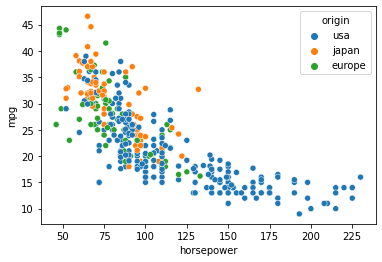

In [106]:
sns.scatterplot(data=df, x='horsepower', y='mpg', hue='origin')
plt.show()

<AxesSubplot:xlabel='origin', ylabel='mpg'>

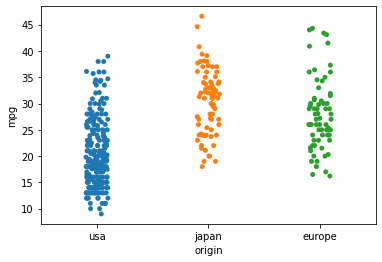

In [113]:
sns.stripplot(data=df, x='origin', y='mpg', jitter=0.1)

In [115]:
df.groupby('origin').count()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,name
origin,,,,,,,,
europe,70,70,70,68,70,70,70,70
japan,79,79,79,79,79,79,79,79
usa,249,249,249,245,249,249,249,249


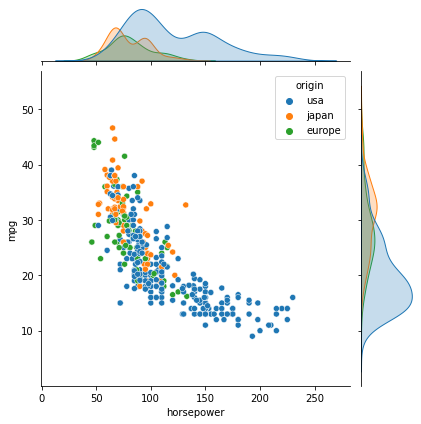

In [117]:
sns.jointplot(data=df, x='horsepower', y='mpg', hue='origin')

<AxesSubplot:xlabel='origin', ylabel='mpg'>

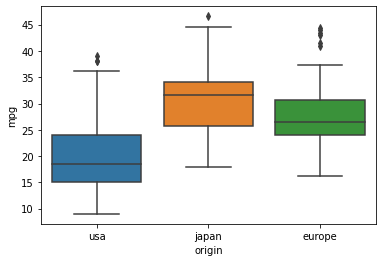

In [114]:
sns.boxplot(data=df, x='origin', y='mpg')

In [119]:
df[df.mpg < 15]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
6,14.0,8,454.0,220.0,4354,9.0,70,usa,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,usa,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,usa,pontiac catalina
11,14.0,8,340.0,160.0,3609,8.0,70,usa,plymouth 'cuda 340
13,14.0,8,455.0,225.0,3086,10.0,70,usa,buick estate wagon (sw)
25,10.0,8,360.0,215.0,4615,14.0,70,usa,ford f250
26,10.0,8,307.0,200.0,4376,15.0,70,usa,chevy c20
27,11.0,8,318.0,210.0,4382,13.5,70,usa,dodge d200
28,9.0,8,304.0,193.0,4732,18.5,70,usa,hi 1200d
38,14.0,8,350.0,165.0,4209,12.0,71,usa,chevrolet impala


In [124]:
df.query("(mpg < 15) & (displacement < 450)")
df[(df.mpg<15)&(df.displacement<450)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
7,14.0,8,440.0,215.0,4312,8.5,70,usa,plymouth fury iii
11,14.0,8,340.0,160.0,3609,8.0,70,usa,plymouth 'cuda 340
25,10.0,8,360.0,215.0,4615,14.0,70,usa,ford f250
26,10.0,8,307.0,200.0,4376,15.0,70,usa,chevy c20
27,11.0,8,318.0,210.0,4382,13.5,70,usa,dodge d200
28,9.0,8,304.0,193.0,4732,18.5,70,usa,hi 1200d
38,14.0,8,350.0,165.0,4209,12.0,71,usa,chevrolet impala
39,14.0,8,400.0,175.0,4464,11.5,71,usa,pontiac catalina brougham
40,14.0,8,351.0,153.0,4154,13.5,71,usa,ford galaxie 500
41,14.0,8,318.0,150.0,4096,13.0,71,usa,plymouth fury iii
